In [130]:
%load_ext autoreload
%autoreload 2
import utils
from chessboard_detection import *
import logging
import sys

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
LOGGER = logging.getLogger('global_logger')
LOGGER.setLevel(logging.INFO)
LOGGER.addHandler(logging.StreamHandler(stream=sys.stdout))

In [138]:
images = utils.read_images('chessboard_patterns/calibration-23.png')
image = images[0]

In [144]:
corners = harris_corner(image)

Harris corner detector found 2078 corners


In [145]:
# utils.visualize_keypoints(image, corners)

Clustering filter: 2078->194 corners


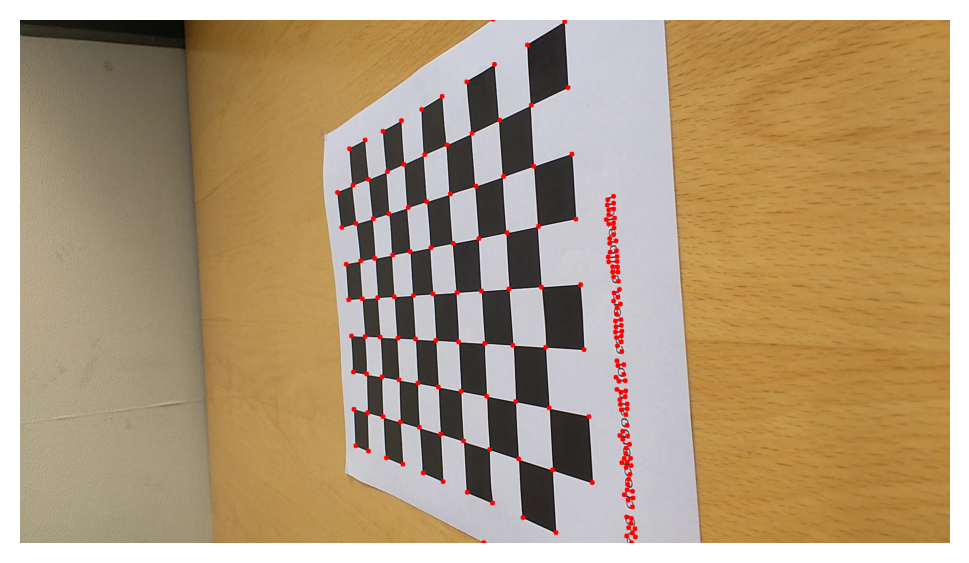

In [146]:
corners = clustering_filter(corners)
utils.visualize_keypoints(image, corners)

Connected component filter: 194->99 corners


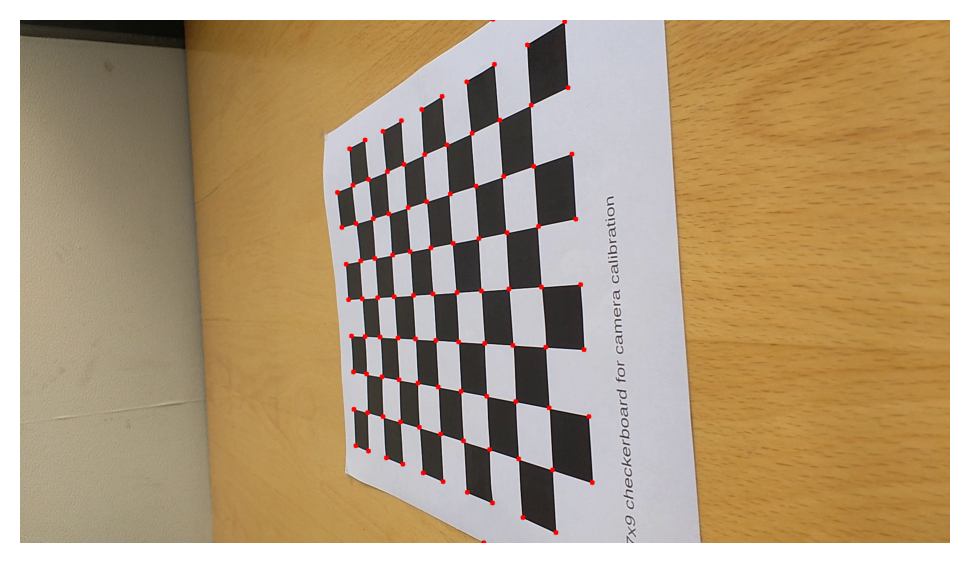

In [147]:
corners = connected_component_filter(corners)
utils.visualize_keypoints(image, corners)

Square response filter: 99->63 corners


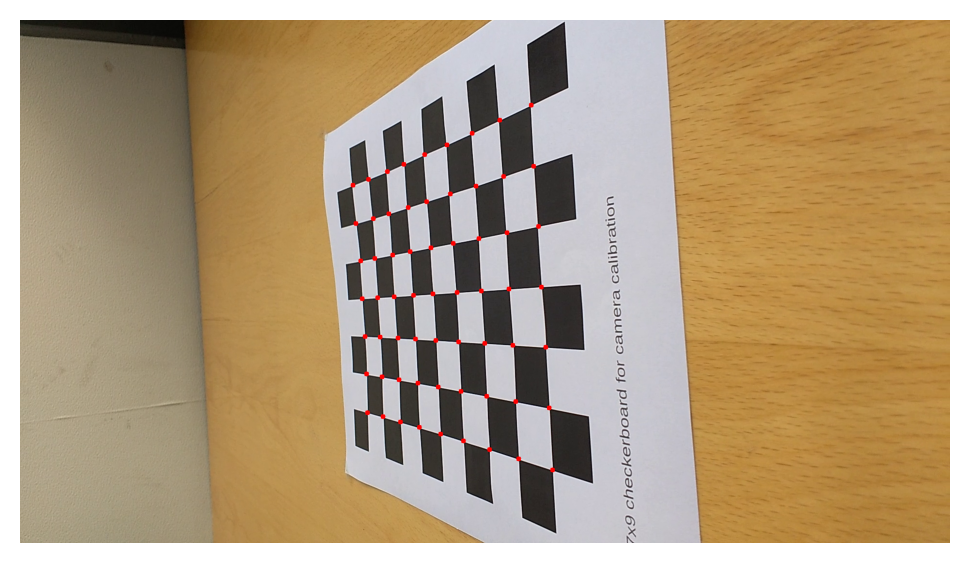

In [148]:
square_response_filter = SquareResponseFilter()
corners = square_response_filter.filter(image, corners)
utils.visualize_keypoints(image, corners)

In [149]:
# if len(corners) != 63:
#     return False